In [1]:
# Step 1: Import Required Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Connect to SQLite Database (or create it)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Step 3: Create Sales Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

In [5]:
# Step 4: Insert Sample Data
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.0),
    ('Orange', 15, 1.5),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [6]:
# Step 5: Run SQL Query for Summary
query = """
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [7]:
# Step 6: Display Summary with Print
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_quantity  total_revenue
0   Apple              45          112.5
1  Banana              90           90.0
2  Orange              45           67.5


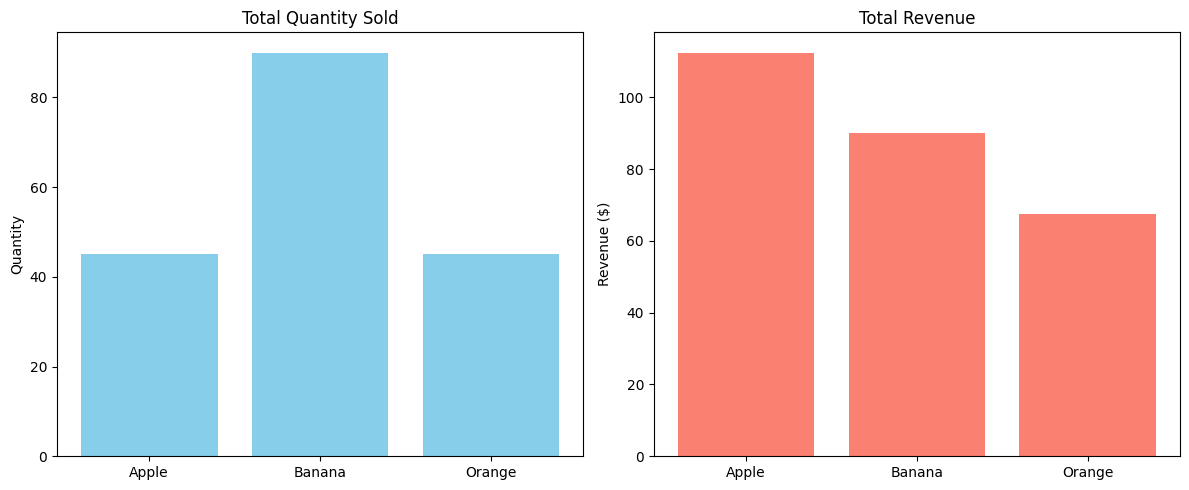

In [8]:
# Step 7: Bar Chart of Total Quantity and Revenue
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Quantity Bar Chart
ax[0].bar(df['product'], df['total_quantity'], color='skyblue')
ax[0].set_title('Total Quantity Sold')
ax[0].set_ylabel('Quantity')

# Revenue Bar Chart
ax[1].bar(df['product'], df['total_revenue'], color='salmon')
ax[1].set_title('Total Revenue')
ax[1].set_ylabel('Revenue ($)')

plt.tight_layout()
plt.show()

In [9]:
# Close connection
conn.close()